## Melakukan Crawling Twitter

In [3]:
"""
Created on Friday August 8 10:02:02 2021

@author: Cango56
"""


import tweepy
import pandas as pd
from datetime import datetime


auth = tweepy.auth.OAuthHandler('SOT6ju510FN30qKhky2GDJcsB',
                                'rAbF5vPGEU0CrdaJYEtbo8HGHb5e0NdO0gopd5iC4AqAw05Yt0')

auth.set_access_token('1243609331884531722-O9ertcKvEFGwcLTco5y7AZPq8rm0M3',
                      'McXL9jiZLfdgk7k3wPb3imrJM8BK93lz14FFrhemF0wFS')

api = tweepy.API(auth, wait_on_rate_limit=True)

# List
tweetan=[]
tanggal=[]
teks=[]
Id=[]
sn=[]
source=[]
rtc=[]
rts=[]
hashtag =[]

#Looping mulai crawling data twitter
for tweet in tweepy.Cursor(api.search,
                           q = "#UMKMSuburBuruhMakmur",count=8000, #keyword untuk mencari tweet
                           tweet_mode='extended', #kalo ga mode extend suka kepotong tweetnya keambil 180 char doang.
                           since = "2020-10-25", #tanggal awal
                           #until = "", #tanggal akhir ini ga di isi gamasalah, boleh juga kalo mau diisi
                           lang = "id").items():
                           
#ini yg ditampilin di runningan jupyter
#Metode append () menambahkan elemen ke akhir daftar
    print(tweet.created_at, tweet.full_text)
    tweetan.append(tweet)
    tanggal.append(tweet.created_at) 
    teks.append(tweet.full_text.encode("utf-8"))
    Id.append(tweet.id)
    sn.append(tweet.user.screen_name)
    source.append(tweet.source)
    rtc.append(tweet.retweet_count)
    hashtag.append([x['text'] for x in tweet.entities['hashtags']])
    if 'RT' in tweet.full_text :
        rts.append(1)
    else :
        rts.append(0)
    print(len(Id))
    
# nah ini di masukin ke file CSV
data = pd.DataFrame()
data['Tanggal']=tanggal
data['Tweets']=teks
data['ID']=Id
data['Screen Name']=sn
data['Retweet']=rtc
data['Source']=source
data['Retweet Status']=rts
data['Hashtags'] = hashtag
data.to_csv(f'Crawl Twitter {datetime.today().strftime("%Y-%m-%d")}.csv', index=False)

# Import Library yang dibutuhkan untuk Melakukan Proses Text Preprocessing, Melakukan Uji Data Training & Testing serta Melakukan Proses Klasifikasi Data

In [2]:
import re
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection,svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
np.random.seed(300)

In [4]:
data = pd.read_csv("DatasetCrawlingTwitter.csv", encoding='latin-1')
data.head(10)

,Tanggal,Tweets,ID,Screen Name,Retweet,Source,Retweet_Status,Hashtags,Sentiment,Negatif,Positif
0,11/4/2020 12:44,b'@Ch_Chotlmah Hahaha\n\n#UMKMSuburBuruhMakmur...,1.320000e+18,SariMita10,0,Twitter for Android,0,['UMKMSuburBuruhMakmur'],negatif,1,0
1,11/4/2020 12:42,b'@tjhinfar21 @Nouna_jessica19 Kami mendukung\...,1.320000e+18,SariMita10,0,Twitter for Android,0,['UMKMSuburBuruhMakmur'],negatif,1,0
2,11/4/2020 12:41,b'@adapawin Mantap\n\n#UMKMSuburBuruhMakmur\nP...,1.320000e+18,SariMita10,0,Twitter for Android,0,['UMKMSuburBuruhMakmur'],negatif,1,0
3,11/4/2020 12:35,b'@Chaterinee_08 Siap\n\n#UMKMSuburBuruhMakmur...,1.320000e+18,Suryono46350704,0,Twitter for Android,0,['UMKMSuburBuruhMakmur'],negatif,1,0
4,11/4/2020 12:34,b'@Chaterinee_08 Setuju\n\n#UMKMSuburBuruhMakm...,1.320000e+18,Suryono46350704,0,Twitter for Android,0,['UMKMSuburBuruhMakmur'],negatif,1,0
5,11/4/2020 12:33,b'@AirinAirin_NZ #UMKMSuburBuruhMakmur\nPatuh ...,1.320000e+18,Suryono46350704,0,Twitter for Android,0,['UMKMSuburBuruhMakmur'],negatif,1,0
6,11/3/2020 14:53,b'Ya Allahhhh....\nUndang-Undang untuk seluruh...,1.320000e+18,Hang_Tuah_,0,Twitter for Android,0,"['PemudaBangkitLawanRezim', 'MosiTidakPercaya'...",negatif,1,0
7,11/3/2020 14:25,b'Presiden @jokowi selalu bertindak cepat apal...,1.320000e+18,FaridBONCELL,2,Twitter for Android,0,"['OmnibusProRakyat', 'OmnibusBeriManfaatBaik',...",negatif,1,0
8,11/3/2020 13:23,"b'Malam, saya lagi ada promo diskon Night Sale...",1.320000e+18,DapurGita_CS,0,Twitter for Android,0,"['diskon', 'promomakanan', 'UMKMSuburBuruhMakm...",negatif,1,0
9,11/3/2020 6:21,b'RT @Ranisor: Jangan Abai Prokes Kovid\n#UMKM...,1.320000e+18,IrulGonjor01,8,Twitter for Android,1,['UMKMSuburBuruhMakmur'],negatif,1,0


In [5]:
data.describe()

,ID,Retweet,Retweet_Status,Negatif,Positif
count,8.223000e+03,8223.000000,8223.000000,8223.000000,8223.000000
mean,1.320000e+18,16.014715,0.625441,0.297823,0.702177
std,2.050685e+05,24.067981,0.484038,0.457329,0.457329
min,1.320000e+18,0.000000,0.000000,0.000000,0.000000
25%,1.320000e+18,0.000000,0.000000,0.000000,0.000000
50%,1.320000e+18,6.000000,1.000000,0.000000,1.000000
75%,1.320000e+18,23.000000,1.000000,1.000000,1.000000
max,1.320000e+18,138.000000,1.000000,1.000000,1.000000


# Proses Text Processing 

In [6]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+' #menghilangkan username 
pat2 = r'https?://[^ ]+' #menghilangkan situs website
combined_pat = r'|'.join((pat1, pat2)) #join pat1 dan pat 2
www_pat = r'www.[^ ]+' #menghilangkan situs website

#set_stopword yang di deskripsikan sendiri
stopword_user = set(pd.read_csv('DatasetCrawlingTwitter.csv', sep='\n', header=0))

In [7]:
def proses_teks(teks):
    soup = BeautifulSoup(teks, 'lxml')
    souped = soup.get_text()
    try:
        teks = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        teks = souped
    teks_bersih= re.sub("[^a-zA-Z0-9]", " ",(re.sub(www_pat, '', re.sub(combined_pat, '', teks)).lower()))
    teks_bersih= ' '.join([word for word in teks_bersih.split() if word not in stopword_user])
    return (" ".join([x for x in tok.tokenize(teks_bersih) if len(x) > 1])).strip()

In [8]:
x=[]
for teks in data.Tweets:
    x.append(proses_teks(teks))

In [9]:
clean_text=pd.DataFrame({'Clean_Tweets':x})

In [10]:
data=pd.concat([data,clean_text],axis=1)

In [11]:
data.head(100)

,Tanggal,Tweets,ID,Screen Name,Retweet,Source,Retweet_Status,Hashtags,Sentiment,Negatif,Positif,Clean_Tweets
0,11/4/2020 12:44,b'@Ch_Chotlmah Hahaha\n\n#UMKMSuburBuruhMakmur...,1.320000e+18,SariMita10,0,Twitter for Android,0,['UMKMSuburBuruhMakmur'],negatif,1,0,hahaha umkmsuburburuhmakmur npatuh prokes agar...
1,11/4/2020 12:42,b'@tjhinfar21 @Nouna_jessica19 Kami mendukung\...,1.320000e+18,SariMita10,0,Twitter for Android,0,['UMKMSuburBuruhMakmur'],negatif,1,0,kami mendukung umkmsuburburuhmakmur npatuh pro...
2,11/4/2020 12:41,b'@adapawin Mantap\n\n#UMKMSuburBuruhMakmur\nP...,1.320000e+18,SariMita10,0,Twitter for Android,0,['UMKMSuburBuruhMakmur'],negatif,1,0,mantap umkmsuburburuhmakmur npatuh prokes agar...
3,11/4/2020 12:35,b'@Chaterinee_08 Siap\n\n#UMKMSuburBuruhMakmur...,1.320000e+18,Suryono46350704,0,Twitter for Android,0,['UMKMSuburBuruhMakmur'],negatif,1,0,siap umkmsuburburuhmakmur npatuh prokes agar s...
4,11/4/2020 12:34,b'@Chaterinee_08 Setuju\n\n#UMKMSuburBuruhMakm...,1.320000e+18,Suryono46350704,0,Twitter for Android,0,['UMKMSuburBuruhMakmur'],negatif,1,0,setuju umkmsuburburuhmakmur npatuh prokes agar...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,11/1/2020 15:33,b'Pemerintahan dibawah kepemimpinan Presiden @...,1.320000e+18,AbuZamzamm,0,Twitter for Android,0,['UMKMSuburBuruhMakmur'],negatif,1,0,pemerintahan dibawah kepemimpinan presiden tel...
96,11/1/2020 15:22,b'RT @Pencerah__: Ketika @SBYudhoyono 10 tahun...,1.320000e+18,pengagumpakde,51,Twitter for Android,1,[],negatif,1,0,rt ketika 10 tahun menjadi presiden bpk menemu...
97,11/1/2020 15:20,b'RT @jr_kw19: Miris! Pimpinan UI Prof Oca yg ...,1.320000e+18,fandy18058347,138,Twitter for iPhone,1,[],negatif,1,0,rt miris pimpinan ui prof oca yg selama ini ny...
98,11/1/2020 15:16,b'RT @Rizmaya__: Kasihan penggemar Anies kejan...,1.320000e+18,LiyantoDoni,46,Twitter for Android,1,['UMKMSuburBuruhMakmur'],negatif,1,0,rt kasihan penggemar anies kejang kejang xf0 x...


# Proses Lihat Data Sentiment "Positif" & "Negatif"

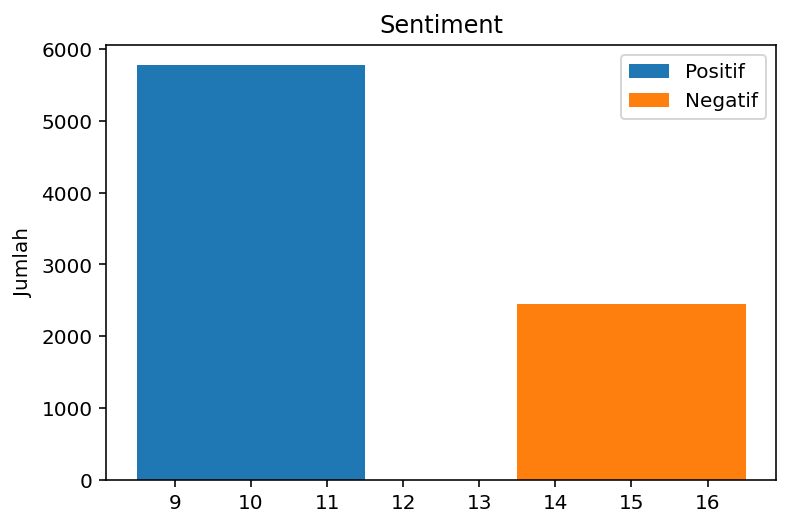

In [12]:
positif_len = data[data['Positif']==1].shape[0]
negatif_len = data[data['Negatif']==1].shape[0]
plt.bar(10,positif_len,3,label="Positif")
plt.bar(15,negatif_len,3,label="Negatif")
plt.legend()
plt.ylabel('Jumlah')
plt.title('Sentiment')
plt.show()

In [13]:
positif_data = data[data['Positif']==1]
negatif_data = data[data['Negatif']==1]

# Melakukan Data Training 80% dan Data Testing 20%

In [14]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data['Tweets'],data['Sentiment'],test_size=0.2)

In [15]:
print('Banyak data X_train :',len(Train_X))
print('Banyak data X_test  :',len(Test_X))
print('Banyak data Y_train :',len(Train_Y))
print('Banyak data Y_test  :',len(Test_Y))

Banyak data X_train : 6578
Banyak data X_test  : 1645
Banyak data Y_train : 6578
Banyak data Y_test  : 1645


# CountVectorize untuk melihat berapa banyak "Kata" didalam Kolom Tweets

In [16]:
Count_vect = CountVectorizer(max_features=5000)
Count_vect.fit(data['Tweets'])
Train_X_Count = Count_vect.transform(Train_X)
Test_X_Count = Count_vect.transform(Test_X)
print(Count_vect.vocabulary_)

{'ch_chotlmah': 827, 'hahaha': 1443, 'umkmsuburburuhmakmur': 4606, 'npatuh': 3078, 'prokes': 3686, 'agar': 278, 'selamat': 4017, 'tjhinfar21': 4474, 'nouna_jessica19': 3067, 'kami': 1776, 'mendukung': 2503, 'adapawin': 260, 'mantap': 2295, 'chaterinee_08': 830, 'siap': 4107, 'setuju': 4093, 'airinairin_nz': 289, 'ya': 4928, 'nundang': 3146, 'undang': 4613, 'untuk': 4626, 'seluruh': 4027, 'rakyat': 3764, 'indonesia': 1581, 'loh': 2209, 'bukan': 769, 'isi': 1628, 'rumah': 3859, 'jan': 1681, 'lah': 2118, 'pemudabangkitlawanrezim': 3398, 'https': 1513, 'co': 848, 'presiden': 3665, 'jokowi': 1734, 'selalu': 4015, 'bertindak': 674, 'cepat': 823, 'apalagi': 391, 'kepentingan': 1928, 'omnibusprorakyat': 3215, 'omnibusberimanfaatbaik': 3211, 'mudahcarikerja': 2788, 'malam': 2276, 'saya': 3923, 'lagi': 2117, 'ada': 257, 'diskon': 1141, 'di': 949, 'shopee': 4101, 'hingga': 1493, '23': 64, 'order': 3238, 'besok': 687, 'aku': 320, 'jika': 1722, 'ini': 1595, 'tiba': 4449, 'kamu': 1782, 'please': 362

# Melakukan Klasifikasi dari Sentiment "Positif" & "Negatif" pada Data Training & Testing

In [17]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Count,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Count)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  65.34954407294833


# Melihat Persentase isi Kolom Sentiment "Positif" & Negatif

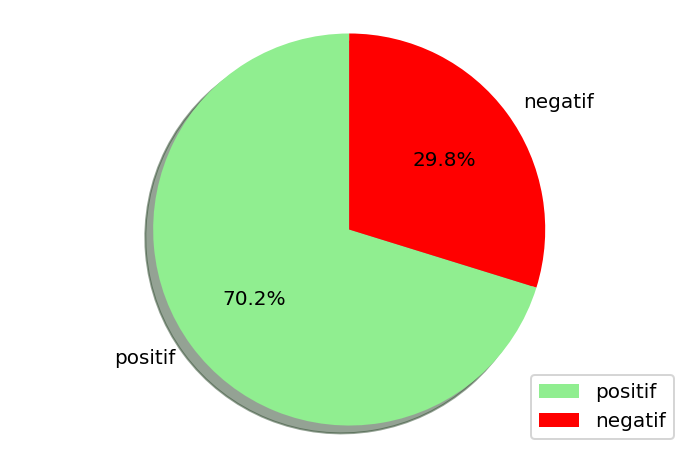

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


from_twitter_predicted = pd.read_csv("DatasetCrawlingTwitter.csv")
from_twitter_predicted.columns = ['Tanggal', 'Tweets', 'ID', 'Screen Name', 'Banyak Retweet', 'Source', 'Retweet Status', 'Hashtags', 'Sentiment', 'Positif', 'Negatif']
labels = 'positif', 'negatif'
sizes = [len(from_twitter_predicted[from_twitter_predicted['Sentiment'] == "positif"]), len(from_twitter_predicted[from_twitter_predicted['Sentiment'] == "negatif"])]
colors = ['lightgreen', 'red']
# Plot
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend()
plt.axis('equal')
plt.show()